In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
train = pd.read_csv("C:\\Users\\pc\\Desktop\\Fall 2018\\Machine Learning\\SMSSpamCollection.csv",sep = "\t", names= ['Status','Message']);
train.head()
len(train)
train.loc[train["Status"] == 'ham',"Status"] = 1 ## 1 for ham and 0 for spam
train.loc[train["Status"] == 'spam',"Status"] = 0
train.head()
X = train["Message"]
Y = train["Status"]

In [5]:
cv = TfidfVectorizer(min_df = 1, stop_words = 'english')
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=4)
x_traincv = cv.fit_transform(x_train)
a = x_traincv.toarray()
x_train.iloc[0]
mnb = MultinomialNB()
y_train = y_train.astype('int')
mnb.fit(x_traincv,y_train)
newmessage = ["['URGENT!]Your Mobbile No398174814449 was awarded a vacation"]
message_cv = cv.transform(newmessage)
message2 = ["Hello my friend, how are you?"]
message2_cv = cv.transform(message2)
pred2 = mnb.predict(message2_cv)
pred2 = pred2.astype('int')
pred = mnb.predict(message_cv)
pred = pred.astype('int')
pred,pred2

(array([0]), array([1]))

In [6]:
x_testcv = cv.transform(x_test)
pred = mnb.predict(x_testcv)
pred
actual = np.array(y_test)
actual
count = 0;
for i in range (len(pred)):
    if pred[i] == actual[i]:
        count = count+1;
count
len(pred)
print("Accuracy is " + str(100*count/len(pred)) + " %")

Accuracy is 95.7847533632287 %


29

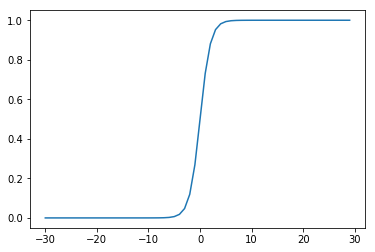

In [23]:
def sigmoid(w,x):
    return (1/(1+np.exp(-w*x)))
x = []
count = -30
while count != 30:
    x.append(count);
    count += 1;
x = np.asarray(x)
plt.plot(x,sigmoid(1,x))
u = sigmoid(1,x) > 0.5
sum(u)

29

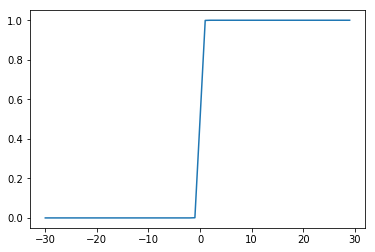

In [24]:
plt.plot(x,sigmoid(7,x))
u = sigmoid(7,x) > 0.5
sum(u)

29

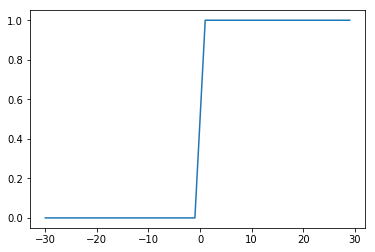

In [25]:
plt.plot(x,sigmoid(150,x))
u = sigmoid(150,x) > 0.5
sum(u)